In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
ads = pd.read_csv('ten_scrapped_data_fixed.csv', names=['ad'])
ads.head()

,ad
0,JR2 Shining Double Row Crystal Metal License P...
1,"[Upgraded]BOYISEN Trailer Hitch Pin Lock, 1/2""..."
2,SUMEX 5070138b Hubcap
3,Rugged Ridge 15201.16 1.25 Wheel Spacer for 20...
4,"Bondhus 33034 Set of 8 Star T-handles, Graduat..."


In [3]:
ads.dropna()
ads_unique = pd.DataFrame(ads['ad'].unique(), columns = ['ad'])
ads_unique.describe()

,ad
count,9934
unique,9934
top,"Dell SE2419H 23.8"" 16:9 IPS Monitor with HDMI ..."
freq,1


In [4]:
def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

print(get_num_words_per_sample(ads_unique['ad']))

11.0


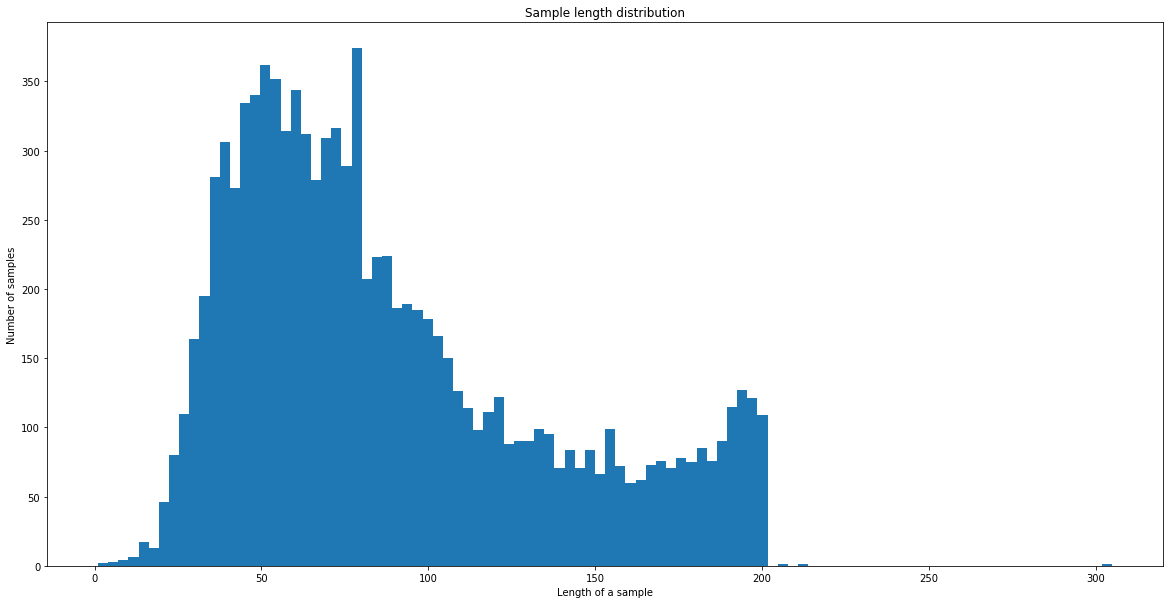

In [26]:
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    
    plt.figure(figsize=(20,10))
    plt.hist([len(s) for s in sample_texts], 100)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()
    

plot_sample_length_distribution(ads_unique['ad'])

### Removing stopwords 

In [27]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

def stopwords(text):
    """Function for removing stopwords."""
    # removing the stop words amd lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the lst of words with space separator
    return " ".join(text)

ads_unique['no_sw'] = ads_unique['ad'].apply(stopwords)
ads_unique.head()

,ad,no_sw
0,JR2 Shining Double Row Crystal Metal License P...,jr2 shining double row crystal metal license p...
1,"[Upgraded]BOYISEN Trailer Hitch Pin Lock, 1/2""...","[upgraded]boyisen trailer hitch pin lock, 1/2""..."
2,SUMEX 5070138b Hubcap,sumex 5070138b hubcap
3,Rugged Ridge 15201.16 1.25 Wheel Spacer for 20...,rugged ridge 15201.16 1.25 wheel spacer 2007-2...
4,"Bondhus 33034 Set of 8 Star T-handles, Graduat...","bondhus 33034 set 8 star t-handles, graduated ..."


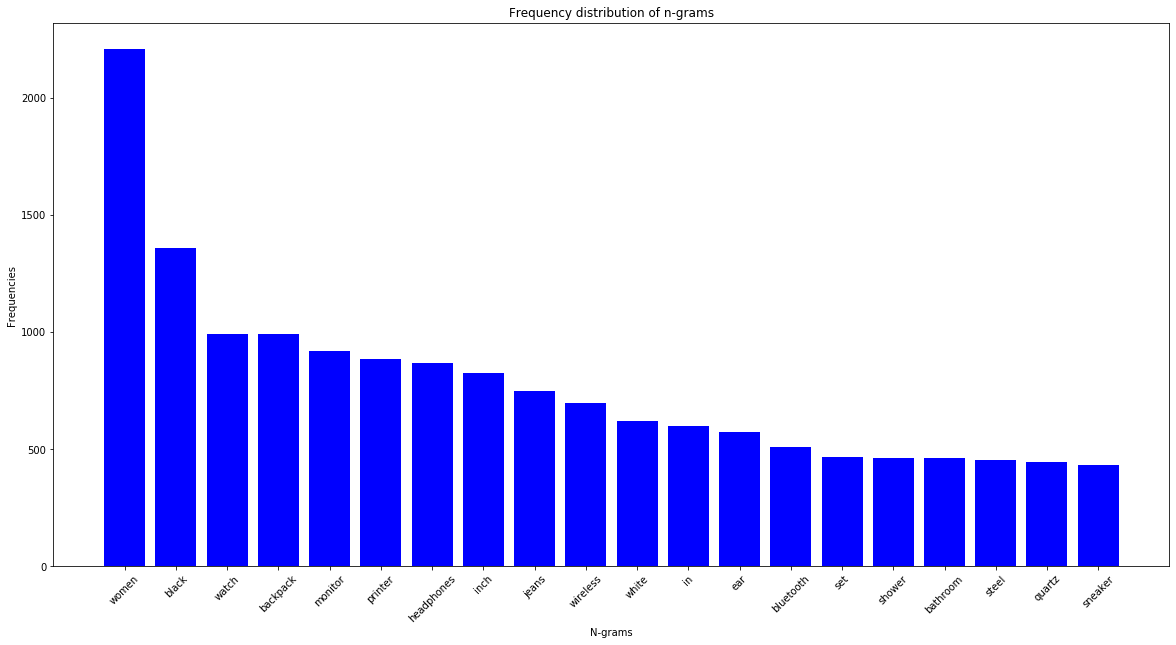

In [28]:
def plot_frequency_distribution_of_ngrams(sample_texts,
                                          ngram_range=(1, 2),
                                          num_ngrams=20):
    """Plots the frequency distribution of n-grams.
    # Arguments
        samples_texts: list, sample texts.
        ngram_range: tuple (min, mplt), The range of n-gram values to consider.
            Min and mplt are the lower and upper bound values for the range.
        num_ngrams: int, number of n-grams to plot.
            Top `num_ngrams` frequent n-grams will be plotted.
    """
    # Create args required for vectorizing.
    kwargs = {
            'ngram_range': (1, 1),
            'dtype': 'int32',
            'strip_accents': 'unicode',
            'decode_error': 'replace',
            'analyzer': 'word',  # Split text into word tokens.
    }
    vectorizer = CountVectorizer(**kwargs)

    # This creates a vocabulary (dict, where keys are n-grams and values are
    # idxices). This also converts every text to an array the length of
    # vocabulary, where every element idxicates the count of the n-gram
    # corresponding at that idxex in vocabulary.
    vectorized_texts = vectorizer.fit_transform(sample_texts)

    # This is the list of all n-grams in the index order from the vocabulary.
    all_ngrams = list(vectorizer.get_feature_names())
    num_ngrams = min(num_ngrams, len(all_ngrams))
    # ngrams = all_ngrams[:num_ngrams]

    # Add up the counts per n-gram ie. column-wise
    all_counts = vectorized_texts.sum(axis=0).tolist()[0]

    # Sort n-grams and counts by frequency and get top `num_ngrams` ngrams.
    all_counts, all_ngrams = zip(*[(c, n) for c, n in sorted(
        zip(all_counts, all_ngrams), reverse=True)])
    ngrams = list(all_ngrams)[:num_ngrams]
    counts = list(all_counts)[:num_ngrams]

    idx = np.arange(num_ngrams)
    plt.figure(figsize=(20,10))
    plt.bar(idx, counts, width=0.8, color='b')
    plt.xlabel('N-grams')
    plt.ylabel('Frequencies')
    plt.title('Frequency distribution of n-grams')
    plt.xticks(idx, ngrams, rotation=45)
    plt.show()
    
    
plot_frequency_distribution_of_ngrams(ads_unique['no_sw'])